In [16]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import os
import sys
import re
import plotly.express as px
import plotly.graph_objects as go
import pickle
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [26]:
from utils import process_tweet

In [29]:
data = pd.read_csv("../data/processed/processed_tweets-$GOOG-2022-07-20.csv")
data.head()
#processing and cleaning the data
data["clean_tweet"] = data["text"].map(lambda x : process_tweet(x))

In [30]:
# pulling the tesla tweets and vectorizing them

tweets = data["clean_tweet"]
tweets.sample()


82    market got you down?  is a beaten down stock w...
Name: clean_tweet, dtype: object

In [31]:
model_dir = 'trained_models/'
vec_file = model_dir+'vectorizer-logistics.pickle'
load_vect = pickle.load(open(vec_file, 'rb'))
tweets_vectorized = load_vect.transform(tweets)
tweets_vectorized.get_shape()

(157, 378164)

In [32]:
file_name = model_dir+'final_logistics_regression.sav'
loaded_model = pickle.load(open(file_name, 'rb'))
data["predictions"] = loaded_model.predict(tweets_vectorized)

In [33]:
data["predictions"].value_counts()

1    92
0    65
Name: predictions, dtype: int64

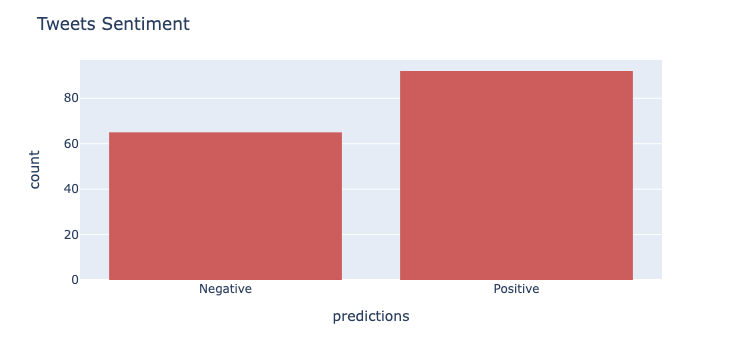

In [34]:
#Histogram to display tweets sentiment
tweet_predictions_senti = data
tweet_predictions_senti["predictions"] = tweet_predictions_senti["predictions"].replace({1:'Positive'})
tweet_predictions_senti["predictions"] = tweet_predictions_senti["predictions"].replace({0:'Negative'})
fig = px.histogram(tweet_predictions_senti, x="predictions")
fig.update_traces(marker_color="indianred", marker_line_color='black')
fig.update_layout(title_text="Tweets Sentiment")
fig.show()

In [35]:
# Data frame date 
df = data["predictions"].value_counts()
sentiment = ''
if df["Negative"] > df["Positive"]:
    sentiment = "Negative"
else:
    sentiment ="Positive"

tweet_date = data["Tweet Date"][0]
dates = tweet_date.rsplit(' ')
dates[0]
d = [[dates[0], sentiment, 'GOOG']]
tweet_df = pd.DataFrame(d, columns=['Date', 'Sentiment', 'Company']) 
tweet_df

,Date,Sentiment,Company
0,2022-07-20,Positive,GOOG


In [36]:
#Storing the data with predicted sentiment labels
data.to_csv('../data/output/sentiment_predictions_tweets-$AAPL-2022-07-20.csv')
tweet_df.to_csv('../data/output/tweet_daily-$AAPL.csv')